In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from data.external import download_data, unzip_data, DATASET_LINK, DATASET_PATH

In [3]:
zip_path = download_data(DATASET_LINK)

In [4]:
file_path = unzip_data(zip_path, DATASET_PATH)

In [6]:
file_path = 'd:\\github_repo\\algerian_forest_fire\\data\\raw\\Algerian_forest_fires_dataset_UPDATE.csv'

'd:\\github_repo\\algerian_forest_fire\\data\\raw\\Algerian_forest_fires_dataset_UPDATE.csv'

In [5]:
df = pd.read_csv(file_path, skiprows=1, skip_blank_lines=True)
df.columns = df.columns.str.strip()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


__Columns Description__
1. __Date__ : (DD/MM/YYYY) Day, month ('June' to 'September'), year (2012)

__Weather data observations__

2. __Temp__ : temperature noon (temperature max)  in Celsius degrees: 22 to 42

3. __RH__ : Relative Humidity in %: 21 to 90 

4. __Ws__ :Wind speed in km/h: 6 to 29 

5. __Rain__: total day in mm: 0 to 16.8

__FWI Components__

6. Fine Fuel Moisture Code (__FFMC__) index from the FWI system: 28.6 to 92.5 

7. Duff Moisture Code (__DMC__) index from the FWI system: 1.1 to 65.9 

8. Drought Code (__DC__) index from the FWI system:  7 to 220.4

9. Initial Spread Index (__ISI__) index from the FWI system: 0 to 18.5 

10. Buildup Index (__BUI__) index from the FWI system: 1.1 to 68

11. Fire Weather Index (__FWI__) Index: 0 to 31.1

12. __Classes__: two classes, namely  'fire' and 'not fire'


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Cleaning Data

In [21]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

Removing Invalid values in `day` column

In [8]:
df[df.Classes.isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Clealy values at index 122 is invalid, so removing this value and values at index 167 inside *DC* column there is an missing comma, cleaning this value also.

In [9]:
df = df[df.day.str.isnumeric()]
df.reset_index(inplace=True, drop=True)

In [18]:
df[df.Classes.isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Cleaning above row

In [11]:
values = []
for value in df[df.Classes.isna()].values[0]:
    if type(value) == str:
        values.extend(value.split())

Replacing the whole row with correct format.

In [13]:
df.loc[165, :] = values

C:\Users\oon00\AppData\Local\Temp\ipykernel_10948\2135169997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[165, :] = values


In [20]:
df.Classes = df.Classes.str.strip()

C:\Users\oon00\AppData\Local\Temp\ipykernel_10948\699570288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Classes = df.Classes.str.strip()


In [48]:
from data.external import DATASET_FILENAME
import os
new_path = os.path.join('../data/interim', DATASET_FILENAME)

ImportError: cannot import name 'DATASET_FILENAME' from 'data.external' (d:\github_repo\algerian_forest_fire\data\external\__init__.py)

In [22]:
df.to_csv(new_path, index=False)

Saving the clean dataset

In [45]:
df = pd.read_csv(new_path)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [49]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

So data is cleaned, now performing some data visualization.

In [66]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


So this is data contains records from June 2012 to September 2012.

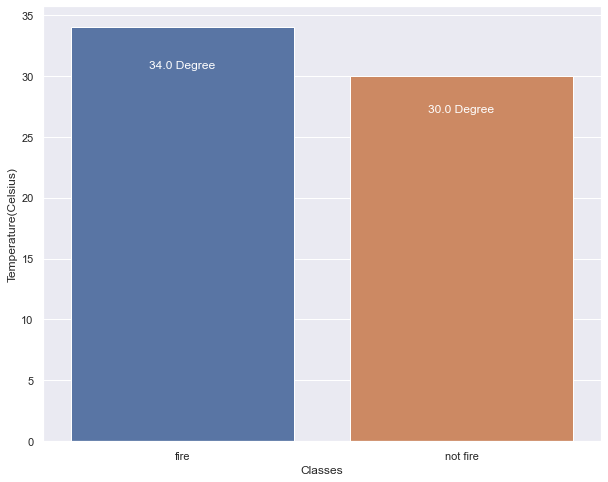

In [24]:
temp = df.groupby('Classes')['Temperature'].median()

sns.set(rc = {'figure.figsize' : (10, 8)})
ax = sns.barplot(x = temp.index, y = temp.values)
plt.ylabel('Temperature(Celsius)')

# labeling the all bar with order type percentage
for i in range(temp.shape[0]):
    x, y = i, temp[i] * 0.9
    s = str(temp[i]) + ' Degree'
    ax.text(x, y, s, color = 'white', ha = 'center')

plt.show()

Median Temperture of is 34 Degree Celsius when there is any fire

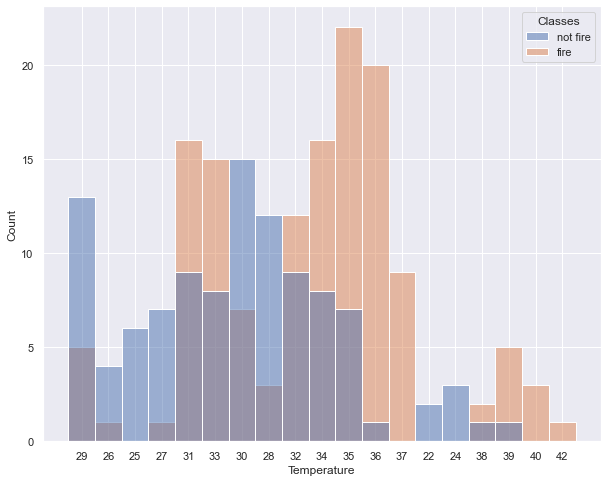

In [25]:
sns.histplot(
    data=df,
    x='Temperature',
    hue='Classes'
)
plt.show()

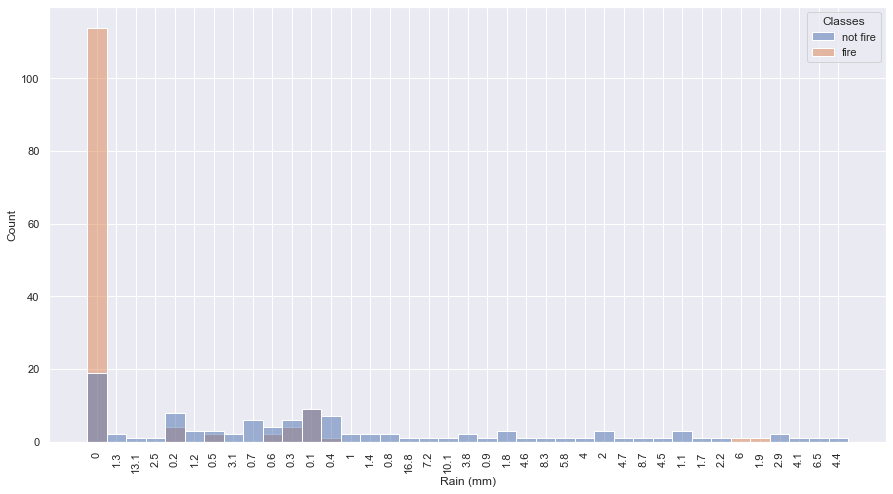

In [31]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.histplot(
    data=df,
    x='Rain',
    hue='Classes'
)
plt.xlabel('Rain (mm)')
plt.xticks(rotation=90)
plt.show()

As we can see most of the times there is not rain at all.

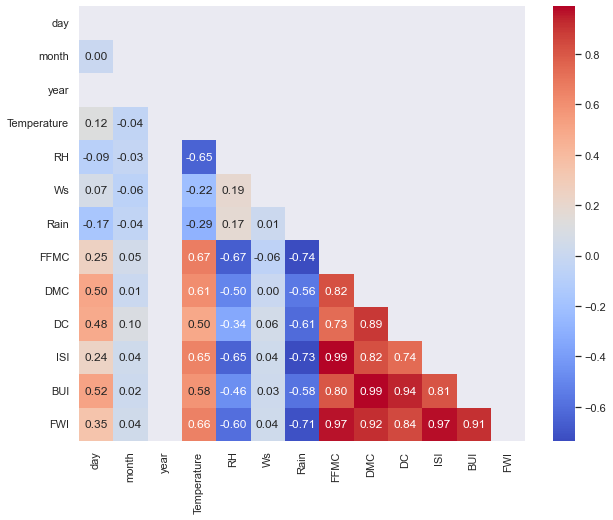

In [64]:
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr.values, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cbar=True, cmap='coolwarm')
plt.show()

As we can clearly see FFMC, DMC, DC, ISI, BUI, FWI columns are highly correlated with each other.

In [69]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


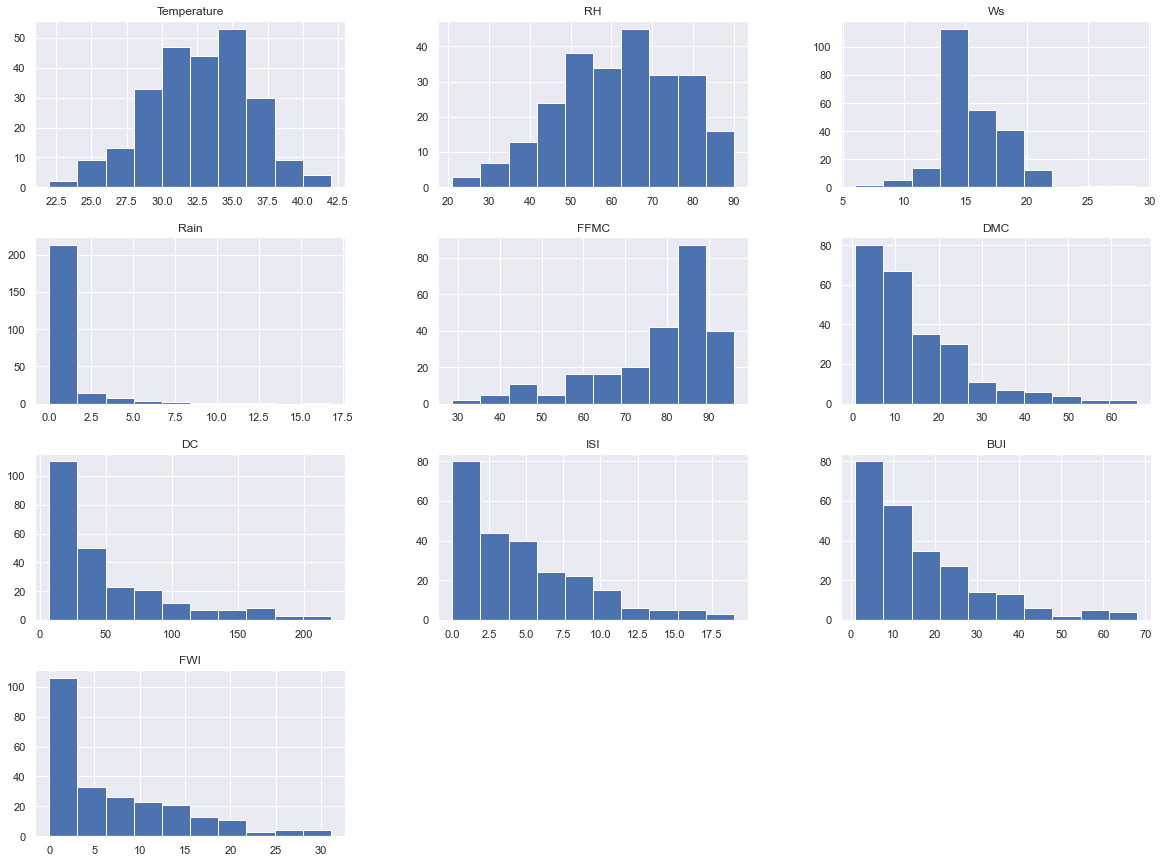

In [77]:
df.hist(
    column=['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
    figsize=(20, 15))
plt.show()

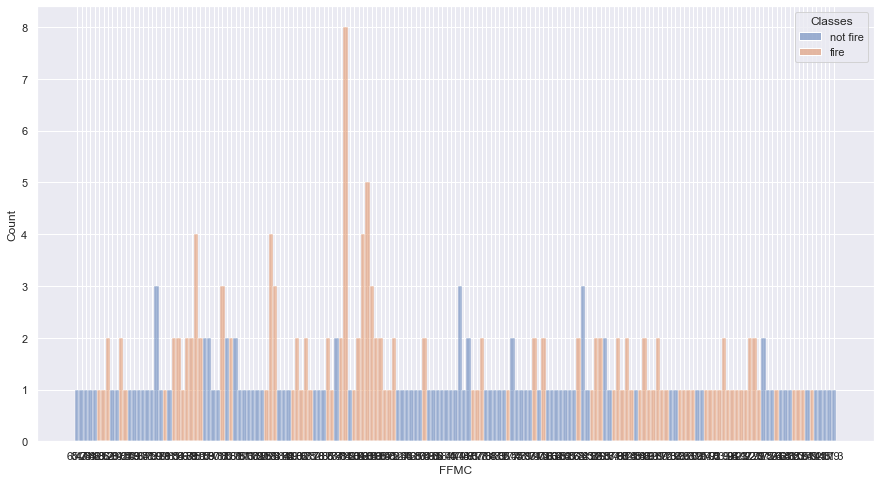

In [32]:
sns.histplot(
    data=df,
    x='FFMC',
    hue='Classes'
)
plt.show()

In [33]:
df.groupby('Classes')['FFMC'].median()

Classes
fire        87.80
not fire    68.25
Name: FFMC, dtype: float64

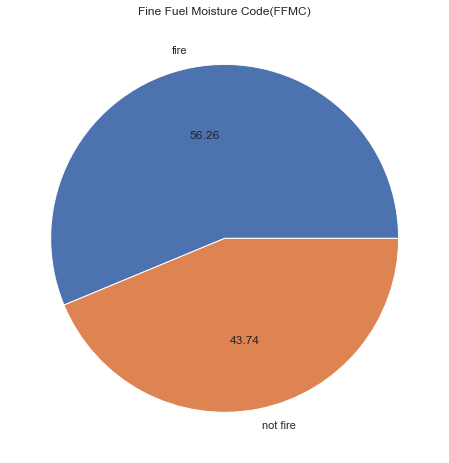

In [37]:
ffmc = df.groupby('Classes')['FFMC'].median()
plt.pie(x=ffmc.values, labels=ffmc.index, autopct='%.2f')
plt.title('Fine Fuel Moisture Code(FFMC)')
plt.show()

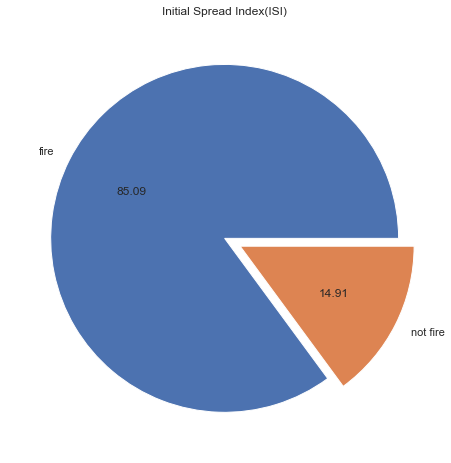

In [39]:
isi = df.groupby('Classes')['ISI'].median()
plt.pie(x=isi.values, labels=isi.index, autopct='%.2f', explode=[0, 0.1])
plt.title('Initial Spread Index(ISI)')
plt.show()

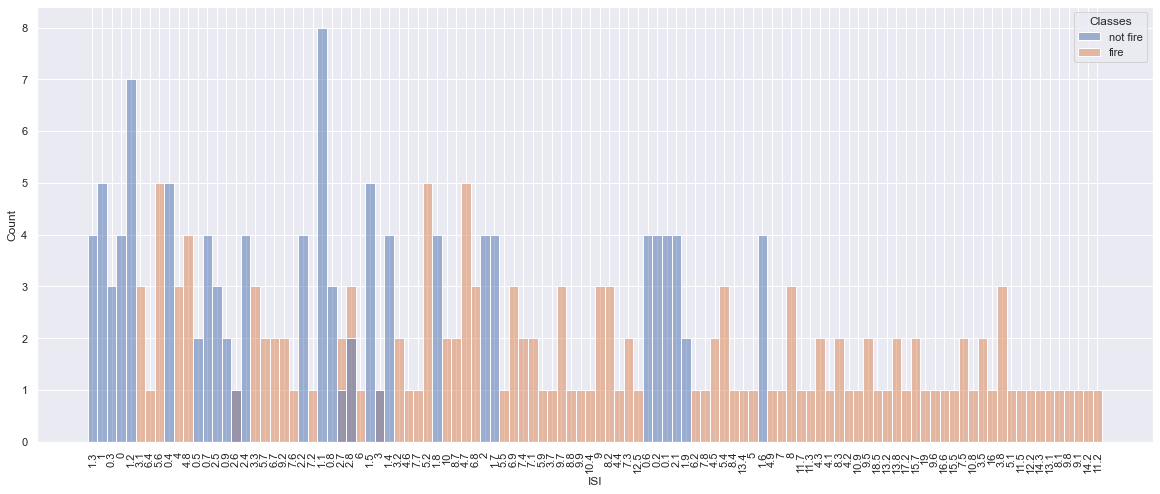

In [46]:
sns.set(rc={'figure.figsize':(20,8)})
sns.histplot(
    data=df,
    x='ISI',
    hue='Classes'
)
plt.xticks(rotation=90)
plt.show()